<a href="https://colab.research.google.com/github/alnibl/3/blob/master/colab/Global_AI_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Dropout
from tensorflow.keras import backend as K 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import utils 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image 
import numpy as np 
import pandas as pd 
from PIL import Image 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler # модуль для стандартизации данных

from tensorflow.keras.preprocessing.text import Tokenizer # Методы для работы с текстами и преобразования их в последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences # Метод для работы с последовательностями
from sklearn.preprocessing import LabelEncoder # Метод кодирования тестовых лейблов

import os 
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_train = pd.read_csv('/content/train.csv')

In [ ]:
df_test

,Unnamed: 0,Smiles
0,0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...
1,1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12
2,2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O
3,3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl
4,4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...
...,...,...
1609,1609,NS(=O)(=O)c1cc2c(cc1Cl)NC(C1CC3C=CC1C3)NS2(=O)=O
1610,1610,Cc1cccc(Nc2ccncc2S(=O)(=O)NC(=O)NC(C)C)c1
1611,1611,CCCC(=O)O[C@]1(C(=O)CO)CC[C@H]2[C@@H]3CCC4=CC(...
1612,1612,CN(C)c1cccc(Oc2cnc(Nc3cccc(O)c3)nc2)c1


In [ ]:
df_train

,Unnamed: 0,Smiles,Active
0,0,COc1ccc2[nH]cc(CCN)c2c1,False
1,1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False
2,2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False
3,3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False
4,4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False
...,...,...,...
5552,5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,False
5553,5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,False
5554,5554,Oc1cccc2cccnc12,False
5555,5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,False


In [ ]:
df_train.isna()

,Unnamed: 0,Smiles,Active
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5552,False,False,False
5553,False,False,False
5554,False,False,False
5555,False,False,False


In [ ]:
# оцениваю на пропуски
df_train.isna().sum()

Unnamed: 0    0
Smiles        0
Active        0
dtype: int64

In [ ]:
df_train.isnull()

,Unnamed: 0,Smiles,Active
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5552,False,False,False
5553,False,False,False
5554,False,False,False
5555,False,False,False


In [ ]:
df_train.count()

Unnamed: 0    5557
Smiles        5557
Active        5557
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5557 entries, 0 to 5556
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5557 non-null   int64 
 1   Smiles      5557 non-null   object
 2   Active      5557 non-null   bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 92.4+ KB


In [ ]:
df_train.describe()

,Unnamed: 0
count,5557.000000
mean,2778.000000
std,1604.312054
min,0.000000
25%,1389.000000
50%,2778.000000
75%,4167.000000
max,5556.000000


In [ ]:
df_train.describe(include=['O'])

,Smiles
count,5557
unique,5557
top,COc1ccc2[nH]cc(CCN)c2c1
freq,1


#Автокодировщик


**Представляю Smiles в виде вектора**

In [ ]:
!pip install kora -q
import kora.install.rdkit # по-дургому не запускалось
from rdkit import Chem
from rdkit.Chem import AllChem

     |████████████████████████████████| 57 kB 3.0 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 


In [ ]:
# загружаю датасет
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,Unnamed: 0,Smiles,Active
0,0,COc1ccc2[nH]cc(CCN)c2c1,False
1,1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False
2,2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False
3,3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False
4,4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False


In [ ]:
df_train_new = df_train[['Smiles', 'Active']]
df_train_new

,Smiles,Active
0,COc1ccc2[nH]cc(CCN)c2c1,False
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False
...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,False
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,False
5554,Oc1cccc2cccnc12,False
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,False


In [ ]:
# df активные молекулы
df_train_True = df_train_new[df_train_new.Active==True]
df_train_True

,Smiles,Active
17,Nc1ccc(O)c2ncccc12,True
38,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,True
52,Cl.NCCc1cc(O)c(O)cc1O,True
111,Cc1ccc(-n2sc(=O)n(Cc3ccc(F)cc3)c2=O)cc1,True
122,Oc1cc2c(cc1C(c1ccc(C(F)(F)F)cc1)N1CCOCC1)OCO2,True
...,...,...
5354,CC(C)c1c2cc(-c3ccnc(N[C@H]4CC[C@H](NC5CCOCC5)C...,True
5492,Sc1nnc(Nc2ccccc2)s1,True
5496,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,True
5520,Nc1c2ccccc2nc2ccccc12,True


In [ ]:
# df неактивные молекулы
df_train_False = df_train_new[df_train_new.Active==False]
df_train_False

,Smiles,Active
0,COc1ccc2[nH]cc(CCN)c2c1,False
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False
...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,False
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,False
5554,Oc1cccc2cccnc12,False
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,False


In [ ]:
# собираю значения Smiles неактивных молекул в лист
s_inactive = []
for i in df_train_False['Smiles']:
  s_inactive.append(i)

print('Длинна s_inactive:', len(s_inactive))
print("Пример значения из s_inactive:", s_inactive[1])

Длинна s_inactive: 5351
Пример значения из s_inactive: CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl


In [ ]:
# активные молекулы
s_active = []
for i in df_train_True['Smiles']:
  s_active.append(i)

print('Длинна s_active:', len(s_active))
print("Пример значения из s_active:", s_active[1])

Длинна s_active: 206
Пример значения из s_active: C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23


In [ ]:
# функция перефода smiles в вектор 0 и 1
def get_morgan_fingerprint(smiles: str, radius=2, nBits=4096):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
    return (list(morgan_fp))

In [ ]:
# для активных
smal_active = []
for i in s_active:
  sm = get_morgan_fingerprint(i)      # получаю вектор из smiles
  smal_active.append(sm)
smal_active = np.array(smal_active)   # преобразую в numpy

print(f"Количество молекул активных: {len(smal_active)}\nДлинна вектора одной молекулы: {len(smal_active[77])}")
print(f'Пример вектора smal_active: {smal_active[77]}')
print(f'Размер массива smal_active: {smal_active.shape}')

Количество молекул активных: 206
Длинна вектора одной молекулы: 4096
Пример вектора smal_active: [0 0 0 ... 0 0 0]
Размер массива smal_active: (206, 4096)


In [ ]:
# для неактивных
smal_inactive = []
for i in s_inactive:
  sm = get_morgan_fingerprint(i)       # получаю вектор из smiles
  smal_inactive.append(sm)
smal_inactive = np.array(smal_inactive)# преобразую в numpy

print(f"Количество молекул не активных: {len(smal_inactive)}\nДлинна вектора одной молекулы: {len(smal_inactive[77])}")
print(f'Пример вектора smal_active: {smal_inactive[77]}')
print(f'Размер массива smal_inactive: {smal_inactive.shape}')

Количество молекул не активных: 5351
Длинна вектора одной молекулы: 4096
Пример вектора smal_active: [0 0 0 ... 0 0 0]
Размер массива smal_inactive: (5351, 4096)


In [ ]:
# тут в виде pd таблицы
#inactive = df_train_new[df_train_new.Active == True] # 
#active = df_train_new[df_train_new.Active == False] # 

In [ ]:
RANDOM_SEED = 42 # задаем случайное значение

# берём неактивные молекулы разбиваем на train_test(только 'X')
X_train, X_test = train_test_split(smal_inactive, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
X_train.shape, X_test.shape, smal_active.shape

((4280, 4096), (1071, 4096), (206, 4096))

In [ ]:
Y_test = np.zeros(1071)
Y_test.shape

(1071,)

In [ ]:
Y_smal_active = np.ones(206)
Y_smal_active.shape

(206,)

In [ ]:
# Добавляем все активные молекулы в тестовый набор данных
X_test = np.concatenate((X_test, smal_active))
Y_test = np.concatenate((Y_test, Y_smal_active))
X_test.shape, Y_test.shape

((1277, 4096), (1277,))

**Нейронная сеть**

In [ ]:
def creditcardAutoencoder(): 
  dataSize = 4096 # размер входного слоя
  dataInput = Input(shape=(dataSize, )) # задаем эти размеры как входные в сеть
  
  x = Dense(10, activation='elu')(dataInput) # пропускаем через полносвязный слой размером 10
  x = Dense(dataSize, activation='relu')(x) # и через полносвязный слой размером 2048
  
  autoencoder = Model(inputs=dataInput, outputs=x) # собрали модель 
  
  autoencoder.compile(optimizer='Adam', loss='mse') # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки
  
  return autoencoder 

In [ ]:
model = creditcardAutoencoder()
history = model.fit(X_train, X_train,
                    epochs=50,
                    batch_size=16) # загружаем данные в модель(X_train'ы) и обучаем

Epoch 1/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0090
Epoch 2/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0080
Epoch 3/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0076
Epoch 4/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0075
Epoch 5/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0074
Epoch 6/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0074
Epoch 7/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0073
Epoch 8/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0073
Epoch 9/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0073
Epoch 10/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0073
Epoch 11/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0072
Epoch 12/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0072
Epoch 13/50
268/268 [====

In [ ]:
predictions_inactive = model.predict(X_test) # делаем предсказание по X_test на неактивных молекулах
predictions_active = model.predict(smal_active) # делаем предсказание smal_active на активных молекулах

In [ ]:
X_test.shape, predictions_inactive.shape

((1483, 4096), (1483, 4096))

In [ ]:
predictions_active.shape

(206, 4096)

In [ ]:
# определяем среднеквадратичную ошибку по smal_active и предсказанием по smal_active
mse_active = np.mean(np.power(smal_active - predictions_active, 2), axis=1)

# определяем среднеквадратичную ошибку по X_test и предсказанием по X_test
mse_inactive = np.mean(np.power(X_test - predictions_inactive, 2), axis=1)

In [ ]:
print("Минимальная ошибка неактивных молекул:", round(min(mse_inactive),4)) #
print("Максимальная ошибка неактивных молекул:", round(max(mse_inactive),4)) #
print("Средняя ошибка неактивных молекул:", round(sum(mse_inactive) / len(mse_inactive),8)) # среднюю ошибку

Минимальная ошибка неактивных молекул: 0.0008
Максимальная ошибка неактивных молекул: 0.0206
Средняя ошибка неактивных молекул: 0.00776771


In [ ]:
print("Минимальная ошибка активных молекул:", round(min(mse_active),4)) #
print("Максимальная ошибка активных молекул:", round(max(mse_active),4)) #
print("Средняя ошибка активных молекул:", round(sum(mse_active) / len(mse_active),8)) # среднюю ошибку

Минимальная ошибка активных молекул: 0.0023
Максимальная ошибка активных молекул: 0.021
Средняя ошибка активных молекул: 0.00731055


**Общий предикт**

In [ ]:
predictions = model.predict(X_test) # делаем предсказание по X_test на неактивных молекулах
predictions.shape

(1277, 4096)

In [ ]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

In [ ]:
mse_Inactivel = mse[:1071] # неактивные
mse_Active = mse[1071:] # активные

In [ ]:
len(mse_Inactivel), len(mse_Active)

(1071, 206)

In [ ]:
print("Минимальная ошибка неактивных молекул:", round(min(mse_Inactivel),4)) #
print("Максимальная ошибка неактивных молекул:", round(max(mse_Inactivel),4)) #
print("Средняя ошибка неактивных молекул:", round(sum(mse_Inactivel) / len(mse_Inactivel),8)) # среднюю ошибку

Минимальная ошибка неактивных молекул: 0.0008
Максимальная ошибка неактивных молекул: 0.0226
Средняя ошибка неактивных молекул: 0.00775119


In [ ]:
print("Минимальная ошибка активных молекул:", round(min(mse_Active),4)) #
print("Максимальная ошибка активных молекул:", round(max(mse_Active),4)) #
print("Средняя ошибка активных молекул:", round(sum(mse_Active) / len(mse_Active),8)) # среднюю ошибку

Минимальная ошибка активных молекул: 0.0019
Максимальная ошибка активных молекул: 0.0204
Средняя ошибка активных молекул: 0.00735226


In [ ]:
def getAccByBias(bias): # функция будет принимать какое то пороговое значение
  isInactive = mse_Inactivel > bias # если ошибка меньше порога - то неактивная
  isActive = mse_Active < bias # если ошибка больше порога - то активная

  accInactive = sum(isInactive) / len(isInactive) # вычисляем процент неактивных
  accActive = sum(isActive) / len(isActive) # вычисляем процент активных

  print("Распознано неактивных молекул: ", round(100*accInactive), "%", sep="")
  print("Распознано активных молекул: ", round(100*accActive), "%", sep="")
  print("Средняя точность распознавания: ", round(50*(accInactive + accActive)), "%", sep="")

In [ ]:
getAccByBias(0.0074)

Распознано неактивных молекул: 49%
Распознано активных молекул: 56%
Средняя точность распознавания: 53%


##**Submit**

In [ ]:
df_train

,Unnamed: 0,Smiles,Active
0,0,COc1ccc2[nH]cc(CCN)c2c1,False
1,1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False
2,2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False
3,3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False
4,4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False
...,...,...,...
5552,5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,False
5553,5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,False
5554,5554,Oc1cccc2cccnc12,False
5555,5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,False


In [ ]:
# Формирую табличку 
submission = df_test
submission['Active'] = ''
submission



,Unnamed: 0,Smiles,Active
0,0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...,
1,1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12,
2,2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,
3,3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl,
4,4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,
...,...,...,...
1609,1609,NS(=O)(=O)c1cc2c(cc1Cl)NC(C1CC3C=CC1C3)NS2(=O)=O,
1610,1610,Cc1cccc(Nc2ccncc2S(=O)(=O)NC(=O)NC(C)C)c1,
1611,1611,CCCC(=O)O[C@]1(C(=O)CO)CC[C@H]2[C@@H]3CCC4=CC(...,
1612,1612,CN(C)c1cccc(Oc2cnc(Nc3cccc(O)c3)nc2)c1,


In [ ]:
# test
test_smiles = []
for i in df_test['Smiles']:
  test_smiles.append(i)

print('Длинна test_smiles:', len(test_smiles))
print("Пример значения из test_smiles:", test_smiles[1])

Длинна test_smiles: 1614
Пример значения из test_smiles: O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12


In [ ]:
test = []
for i in test_smiles:
  sm = get_morgan_fingerprint(i)      # получаю вектор из smiles
  test.append(sm)
test = np.array(test)   # преобразую в numpy
test.shape

(1614, 4096)

In [ ]:
predictions_test = model.predict(test) # делаем предсказание по X_test на неактивных молекулах

In [ ]:
predictions_test

In [ ]:
mse_test = np.mean(np.power(test - predictions_test, 2), axis=1)

In [ ]:
print("Минимальная ошибка молекул:", round(min(mse_test),4)) #
print("Максимальная ошибка молекул:", round(max(mse_test),4)) #
print("Средняя ошибка молекул:", round(sum(mse_test) / len(mse_test),8)) # среднюю ошибку

Минимальная ошибка молекул: 0.0008
Максимальная ошибка молекул: 0.0325
Средняя ошибка молекул: 0.00782778


In [ ]:
mse_test.shape

(1614,)

In [ ]:
for i in range(len(mse_test)):
  if mse_test[i] >= 0.0074:
    submission['Active'].values[i] = 0
  else:
    submission['Active'].values[i] = 1





In [ ]:
submission

,Unnamed: 0,Smiles,Active
0,0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...,0
1,1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12,1
2,2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,1
3,3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl,1
4,4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,0
...,...,...,...
1609,1609,NS(=O)(=O)c1cc2c(cc1Cl)NC(C1CC3C=CC1C3)NS2(=O)=O,0
1610,1610,Cc1cccc(Nc2ccncc2S(=O)(=O)NC(=O)NC(C)C)c1,0
1611,1611,CCCC(=O)O[C@]1(C(=O)CO)CC[C@H]2[C@@H]3CCC4=CC(...,1
1612,1612,CN(C)c1cccc(Oc2cnc(Nc3cccc(O)c3)nc2)c1,0


In [ ]:
submission.to_csv('submission.csv', index=False)

## Свертка Conv2D

In [ ]:
#X_train.shape, X_test.shape, smal_active.shape

In [ ]:
#X_train = np.reshape(X_train, (4280, 64, 64, 1))

In [ ]:
#X_test = np.reshape(X_test, (1071, 64, 64, 1))
#smal_active = np.reshape(smal_active, (206, 64, 64, 1))

In [ ]:
#X_train.shape, X_test.shape, smal_active.shape

In [ ]:
#X_train[0].shape

In [ ]:
X_train.shape, X_test.shape, smal_active.shape

((4280, 4096), (1071, 4096), (206, 4096))

In [ ]:
def Autoencoder(): 
    img_input = Input(shape=(4096,)) 

    x = Reshape((64,64,1))(img_input)

    x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Flatten()(x) # сплющиваем в одномерный вектор - размер 4*4*256
    z = Dense(256, activation='relu')(x) # добавляем полносвязный слой
    x = Dense(4*4*256, activation='relu')(z) # и еще полносвязный слой с переводом в 8960-мерное пространство(7*5*256)
    x = Reshape((4,4,256))(x) # меняем размеры - картинка 4*4 , 256 ядер
    x = Conv2DTranspose(256, (3, 3), strides=2, padding='same')(x) 
    x = Conv2DTranspose(128, (3, 3), strides=2, padding='same')(x) 
    x = Conv2DTranspose(64, (3, 3), strides=2, padding='same')(x) 
    x = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x) 
    x = Conv2D(1, (3, 3), activation='relu', padding='same')(x) 
    x = Flatten()(x)

    x = Dense(4096, activation='sigmoid')(x) 

    model = Model(img_input, x) # собрали модель с зашумленной картинкой на вход и с очищенной от шума на выход
    model.compile(optimizer='adam',
                  loss='mse') # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки

    return model # функция вернет модель подавления шума

In [ ]:
model_Conv2D = Autoencoder()
model_Conv2D.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 4096)]            0         
                                                                 
 reshape_9 (Reshape)         (None, 64, 64, 1)         0         
                                                                 
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_41 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_42 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 conv2d_43 (Conv2D)          (None, 4, 4, 256)         295168    
                                                                 
 flatten_9 (Flatten)         (None, 4096)              0  

In [ ]:
model_Conv2D = Autoencoder()

In [ ]:
history = model_Conv2D.fit(X_train, X_train, epochs=10, batch_size=16) 

Epoch 1/10
268/268 [==============================] - 9s 29ms/step - loss: 0.2198
Epoch 2/10
268/268 [==============================] - 8s 29ms/step - loss: 0.1678
Epoch 3/10
268/268 [==============================] - 8s 29ms/step - loss: 0.1284
Epoch 4/10
268/268 [==============================] - 8s 29ms/step - loss: 0.0994
Epoch 5/10
268/268 [==============================] - 8s 29ms/step - loss: 0.0782
Epoch 6/10
268/268 [==============================] - 8s 29ms/step - loss: 0.0627
Epoch 7/10
268/268 [==============================] - 8s 29ms/step - loss: 0.0512
Epoch 8/10
268/268 [==============================] - 8s 29ms/step - loss: 0.0425
Epoch 9/10
268/268 [==============================] - 8s 29ms/step - loss: 0.0360
Epoch 10/10
268/268 [==============================] - 8s 29ms/step - loss: 0.0309


In [ ]:
predictions_inactive = model_Conv2D.predict(X_test) # делаем предсказание по X_test на неактивных молекулах
predictions_active = model_Conv2D.predict(smal_active) # делаем предсказание smal_active на активных молекулах

In [ ]:
# определяем среднеквадратичную ошибку по smal_active и предсказанием по smal_active
mse_active = np.mean(np.power(smal_active - predictions_active, 2), axis=1)

# определяем среднеквадратичную ошибку по X_test и предсказанием по X_test
mse_inactive = np.mean(np.power(X_test - predictions_inactive, 2), axis=1)

In [ ]:
print("Минимальная ошибка неактивных молекул:", round(min(mse_inactive),4)) #
print("Максимальная ошибка неактивных молекул:", round(max(mse_inactive),4)) #
print("Средняя ошибка неактивных молекул:", round(sum(mse_inactive) / len(mse_inactive),4)) # среднюю ошибку

Минимальная ошибка неактивных молекул: 0.0237
Максимальная ошибка неактивных молекул: 0.0406
Средняя ошибка неактивных молекул: 0.0287


In [ ]:
print("Минимальная ошибка активных молекул:", round(min(mse_active),4)) #
print("Максимальная ошибка активных молекул:", round(max(mse_active),4)) #
print("Средняя ошибка активных молекул:", round(sum(mse_active) / len(mse_active),4)) # среднюю ошибку

Минимальная ошибка активных молекул: 0.0247
Максимальная ошибка активных молекул: 0.0386
Средняя ошибка активных молекул: 0.0282


##По-другому токенезирую, Tokenizer

In [ ]:
# загружаю датасет
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,Unnamed: 0,Smiles,Active
0,0,COc1ccc2[nH]cc(CCN)c2c1,False
1,1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False
2,2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False
3,3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False
4,4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False


In [ ]:
df_train_new = df_train[['Smiles', 'Active']]


In [ ]:
# df активные молекулы
df_train_True = df_train_new[df_train_new.Active==True]


In [ ]:
# df неактивные молекулы
df_train_False = df_train_new[df_train_new.Active==False]

In [ ]:
# собираю значения Smiles неактивных молекул в лист
s_inactive = []
for i in df_train_False['Smiles']:
  s_inactive.append(i)

print('Длинна s_inactive:', len(s_inactive))
print("Пример значения из s_inactive:", s_inactive[1])

Длинна s_inactive: 5351
Пример значения из s_inactive: CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl


In [ ]:
# активные молекулы
s_active = []
for i in df_train_True['Smiles']:
  s_active.append(i)

print('Длинна s_active:', len(s_active))
print("Пример значения из s_active:", s_active[1])

Длинна s_active: 206
Пример значения из s_active: C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23


In [ ]:
# все молекулы
Smiles = s_active + s_inactive
len(Smiles)

5557

In [ ]:
maxWordsCount = 4096 # Определяем максимальное количество слов/индексов, учитываемое при обучении текстов

# Воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
# num_words=maxWordsCount - определяем максимальное количество слов/индексов, учитываемое при обучении текстов
# filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n' - избавляемся от ненужных символов
# lower=True - приводим слова к нижнему регистру
# split=' ' - разделяем слова по пробелу
# char_level=False - токенизируем по словам (Если будет True - каждый символ будет рассматриваться как отдельный токен )
tokenizer = Tokenizer(num_words=maxWordsCount, filters='', lower=False, split='', oov_token='unknown', char_level=True)

tokenizer.fit_on_texts(Smiles) # "Скармливаем" наши тексты, т.е. даём в обработку методу, который соберет словарь частотности
items = list(tokenizer.word_index.items()) # Вытаскиваем индексы слов для просмотра

In [ ]:
print(items[:50]) # Посмотрим 50 самых часто встречающихся слов
print("Размер словаря", len(items)) # Длина словаря

[('unknown', 1), ('c', 2), ('C', 3), ('(', 4), (')', 5), ('O', 6), ('1', 7), ('2', 8), ('=', 9), ('@', 10), ('N', 11), ('[', 12), (']', 13), ('H', 14), ('n', 15), ('3', 16), ('F', 17), ('4', 18), ('-', 19), ('l', 20), ('S', 21), ('/', 22), ('.', 23), ('5', 24), ('+', 25), ('s', 26), ('o', 27), ('#', 28), ('\\', 29), ('B', 30), ('r', 31), ('P', 32), ('I', 33), ('a', 34), ('6', 35), ('7', 36), ('A', 37), ('8', 38), ('i', 39), ('K', 40), ('Z', 41), ('g', 42), ('M', 43), ('L', 44), ('e', 45), ('9', 46)]
Размер словаря 46


In [ ]:
# Преобразовываем текст в последовательность индексов согласно частотному словарю
s_inactive_WordIndexes = tokenizer.texts_to_sequences(s_inactive) # тесты в индексы
s_active_WordIndexes = tokenizer.texts_to_sequences(s_active) # тесты в индексы

In [ ]:
print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", s_inactive[1])
print("Он же в виде последовательности индексов: ", s_inactive_WordIndexes[1], '\n')
len(s_inactive[1]), len(s_inactive_WordIndexes[1])

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:               CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl
Он же в виде последовательности индексов:  [3, 3, 3, 11, 7, 3, 3, 3, 12, 3, 10, 14, 13, 4, 2, 8, 2, 2, 2, 2, 4, 6, 5, 2, 8, 5, 3, 7, 23, 3, 20] 



(31, 31)

In [ ]:
X_tr = tokenizer.sequences_to_matrix(s_inactive_WordIndexes)
smal_active = tokenizer.sequences_to_matrix(s_active_WordIndexes)

print(X_tr.shape, smal_active.shape)       # Размер обучающей выборки, сформированной по Bag of Words
print(X_tr[0][0:100]) # Фрагмент набора слов в виде Bag of Words

(5351, 4096) (206, 4096)
[0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
RANDOM_SEED = 42 # задаем случайное значение

# берём неактивные молекулы разбиваем на train_test(только 'X')
X_train, X_test = train_test_split(X_tr, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
model = creditcardAutoencoder()
model.summary()

Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 4096)]            0         
                                                                 
 dense_77 (Dense)            (None, 10)                40970     
                                                                 
 dense_78 (Dense)            (None, 4096)              45056     
                                                                 
Total params: 86,026
Trainable params: 86,026
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, X_train,
                    epochs=50,
                    batch_size=16) # загружаем данные в модель(X_train'ы) и обучаем

Epoch 1/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0012
Epoch 2/50
268/268 [==============================] - 1s 4ms/step - loss: 7.6950e-04
Epoch 3/50
268/268 [==============================] - 1s 4ms/step - loss: 5.7226e-04
Epoch 4/50
268/268 [==============================] - 1s 4ms/step - loss: 4.4639e-04
Epoch 5/50
268/268 [==============================] - 1s 4ms/step - loss: 3.6428e-04
Epoch 6/50
268/268 [==============================] - 1s 3ms/step - loss: 2.9274e-04
Epoch 7/50
268/268 [==============================] - 1s 3ms/step - loss: 2.4510e-04
Epoch 8/50
268/268 [==============================] - 1s 3ms/step - loss: 2.2310e-04
Epoch 9/50
268/268 [==============================] - 1s 3ms/step - loss: 2.0973e-04
Epoch 10/50
268/268 [==============================] - 1s 3ms/step - loss: 1.9993e-04
Epoch 11/50
268/268 [==============================] - 1s 4ms/step - loss: 1.9206e-04
Epoch 12/50
268/268 [==============================] - 1s 4ms/step 

In [ ]:
predictions_inactive = model.predict(X_test) # делаем предсказание по X_test на неактивных молекулах
predictions_active = model.predict(smal_active) # делаем предсказание smal_active на активных молекулах

In [ ]:
# определяем среднеквадратичную ошибку по smal_active и предсказанием по smal_active
mse_active = np.mean(np.power(smal_active - predictions_active, 2), axis=1)

# определяем среднеквадратичную ошибку по X_test и предсказанием по X_test
mse_inactive = np.mean(np.power(X_test - predictions_inactive, 2), axis=1)

In [ ]:
print("Минимальная ошибка неактивных молекул:", round(min(mse_inactive),4)) #
print("Максимальная ошибка неактивных молекул:", round(max(mse_inactive),4)) #
print("Средняя ошибка неактивных молекул:", round(sum(mse_inactive) / len(mse_inactive),7)) # среднюю ошибку
print()
print("Минимальная ошибка активных молекул:", round(min(mse_active),4)) #
print("Максимальная ошибка активных молекул:", round(max(mse_active),4)) #
print("Средняя ошибка активных молекул:", round(sum(mse_active) / len(mse_active),7)) # среднюю ошибку

Минимальная ошибка неактивных молекул: 0.0005
Максимальная ошибка неактивных молекул: 0.0053
Средняя ошибка неактивных молекул: 0.0029931

Минимальная ошибка активных молекул: 0.0012
Максимальная ошибка активных молекул: 0.0053
Средняя ошибка активных молекул: 0.0029561


##Делаю тоже, только через таблицу

In [ ]:
!pip install kora -q
import kora.install.rdkit # по-дургому не запускалось
from rdkit import Chem
from rdkit.Chem import AllChem

     |████████████████████████████████| 57 kB 1.9 MB/s 
     |████████████████████████████████| 56 kB 2.3 MB/s 


In [ ]:
df_train_new = df_train[['Smiles', 'Active']]
df_train_new

,Smiles,Active
0,COc1ccc2[nH]cc(CCN)c2c1,False
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False
...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,False
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,False
5554,Oc1cccc2cccnc12,False
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,False


In [ ]:
def get_morgan_fingerprint(smiles: str, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
    return morgan_fp

In [ ]:
# в таблице меняю smiles на вектор
for n, s in enumerate(df_train_new['Smiles']):
  sm = get_morgan_fingerprint(s) # получаю вектор из smiles
  sm = np.array(sm)
  df_train_new['Smiles'].values[n] = sm # записываю в таблицу
  

In [ ]:
df_train_new

,Smiles,Active
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
...,...,...
5552,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
5553,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
5554,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
5555,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False


In [ ]:
inactive = df_train_new[df_train_new.Active == False] # активные молекулы
active = df_train_new[df_train_new.Active == True] # не активные молекулы

In [ ]:
inactive.shape, active.shape,

((5351, 2), (206, 2))

In [ ]:
RANDOM_SEED = 42 # задаем случайное значение

# берём неактивные молекулы разбиваем на train_test(только 'X')
X_train, X_test = train_test_split(inactive, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
X_train.shape, X_test.shape

((4280, 2), (1071, 2))

In [ ]:
# Удаляем столбец Active в обучающем наборе данных
X_train = X_train.drop(['Active'], axis=1)
# Добавляем все активные молекулы в тестовый набор данных
X_test = pd.concat([X_test, active])
# Делаем метки для тестового набора данных
y_test = X_test['Active']
# Удаляем столбец 'Active' у тестового набора данных
X_test = X_test.drop(['Active'], axis=1)
# Преобразуем данные в массивы numpy
X_train = X_train.values
X_test = X_test.values

In [ ]:
#X_train = np.array(X_train['Smiles'])
#X_test = np.array(X_test['Smiles'])

In [ ]:
print(X_train.shape, X_test.shape)

(4280, 1) (1277, 1)


In [ ]:
X_train[0].shape

(1,)

In [ ]:
X_train = X_train.reshape((4280, 2048))
X_test = X_test.reshape((1277, 2048))

In [ ]:
print(X_train.shape, X_test.shape)

(4280, 2048) (1071, 2048)


In [ ]:
def creditcardAutoencoder(): # объявляем автокодировщик для определения мошенич.транзакций
  dataSize = 2048 # берём размеры X_train по второй оси(30)
  dataInput = Input(shape=(dataSize, )) # задаем эти размеры как входные в сеть
  
  x = Dense(256, activation='relu')(dataInput) # пропускаем через полносвязный слой размером 10
  x = Dense(dataSize, activation='relu')(x) # и через полносвязный слой размером 30 
  
  autoencoder = Model(inputs=dataInput, outputs=x) # собрали модель 
  
  autoencoder.compile(optimizer='Adam', loss='mse') # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки
  
  return autoencoder 

In [ ]:
model = creditcardAutoencoder()
history = model.fit(X_train, X_train,
                    epochs=10,
                    batch_size=16) # загружаем данные в модель(X_train'ы) и обучаем

Epoch 1/10
268/268 [==============================] - 2s 4ms/step - loss: 0.0140
Epoch 2/10
268/268 [==============================] - 1s 4ms/step - loss: 0.0106
Epoch 3/10
268/268 [==============================] - 1s 4ms/step - loss: 0.0100
Epoch 4/10
268/268 [==============================] - 1s 4ms/step - loss: 0.0097
Epoch 5/10
268/268 [==============================] - 1s 4ms/step - loss: 0.0096
Epoch 6/10
268/268 [==============================] - 1s 4ms/step - loss: 0.0096
Epoch 7/10
268/268 [==============================] - 1s 4ms/step - loss: 0.0095
Epoch 8/10
268/268 [==============================] - 1s 4ms/step - loss: 0.0095
Epoch 9/10
268/268 [==============================] - 1s 4ms/step - loss: 0.0095
Epoch 10/10
268/268 [==============================] - 1s 4ms/step - loss: 0.0095


In [ ]:
predictions_inactive = model.predict(X_test) # делаем предсказание по X_test
predictions_active = model.predict(smal_active)

In [ ]:
X_test.shape, predictions_inactive.shape

((1071, 2048), (1071, 2048))

In [ ]:
mse_inactive = np.mean(np.power(X_test - predictions_inactive, 2), axis=1) # определяем среднеквадратичную ошибку по X_test и предсказанием по X_test

In [ ]:
smal_active.shape, predictions_active.shape

((206, 2048), (206, 2048))

In [ ]:
mse_active = np.mean(np.power(smal_active - predictions_active, 2), axis=1)

In [ ]:
#mse_normal = mse[y_test.values == 0] # 
#mse_frauds = mse[y_test.values == 1] # 

In [ ]:
print("Минимальная ошибка неактивных молекул:", round(min(mse_inactive),4)) #
print("Максимальная ошибка неактивных молекул:", round(max(mse_inactive),4)) #
print("Средняя ошибка неактивных молекул:", round(sum(mse_inactive) / len(mse_inactive),4)) # среднюю ошибку

Минимальная ошибка неактивных молекул: 0.0002
Максимальная ошибка неактивных молекул: 0.0335
Средняя ошибка неактивных молекул: 0.0098


In [ ]:
print("Минимальная ошибка активных молекул:", round(min(mse_active),4)) #
print("Максимальная ошибка активных молекул:", round(max(mse_active),4)) #
print("Средняя ошибка активных молекул:", round(sum(mse_active) / len(mse_active),4)) # среднюю ошибку

Минимальная ошибка активных молекул: 0.0021
Максимальная ошибка активных молекул: 0.0339
Средняя ошибка активных молекул: 0.0094


In [ ]:
def getAccByBias(bias): # функция будет принимать какое то пороговое значение
  isNormal = mse_normal < bias # если ошибка меньше порога - то транзакция нормальная
  isFrauds = mse_frauds > bias # если ошибка больше порога - то транзакция мошенническая

  accNormal = sum(isNormal) / len(isNormal) # вычисляем процент нормальных операций
  accFaruds = sum(isFrauds) / len(isFrauds) # вычисляем процент мошеннических операций

  print("Распознано нормальных трансакций: ", round(100*accNormal), "%", sep="")
  print("Распознано мошеннических трансакций: ", round(100*accFaruds), "%", sep="")
  print("Средняя точность распознавания: ", round(50*(accNormal + accFaruds)), "%", sep="")

# Классификация на 206 примерах

In [ ]:
df_train_new = df_train[['Smiles', 'Active']]
df_train_new

,Smiles,Active
0,COc1ccc2[nH]cc(CCN)c2c1,False
1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False
2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False
3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False
4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False
...,...,...
5552,O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c...,False
5553,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1,False
5554,Oc1cccc2cccnc12,False
5555,OC(c1ccc(-c2ccc(CN3CCN(Cc4ccncc4)CC3)cc2)c(F)c...,False


In [ ]:
# df активные молекулы
df_train_True = df_train_new[df_train_new.Active==True]
# df неактивные молекулы
df_train_False = df_train_new[df_train_new.Active==False]

In [ ]:
# собираю значения Smiles неактивных молекул в лист
s_inactive = []
for i in df_train_False['Smiles']:
  s_inactive.append(i)

print('Длинна s_inactive:', len(s_inactive))
print("Пример значения из s_inactive:", s_inactive[1])

Длинна s_inactive: 5351
Пример значения из s_inactive: CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl


In [ ]:
# активные молекулы
s_active = []
for i in df_train_True['Smiles']:
  s_active.append(i)

print('Длинна s_active:', len(s_active))
print("Пример значения из s_active:", s_active[1])

Длинна s_active: 206
Пример значения из s_active: C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23


In [ ]:
# функция перефода smiles в вектор 0 и 1
def get_morgan_fingerprint(smiles: str, radius=2, nBits=4096):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
    return (list(morgan_fp))

In [ ]:
# для активных
smal_active = []
for i in s_active:
  sm = get_morgan_fingerprint(i)      # получаю вектор из smiles
  smal_active.append(sm)
smal_active = np.array(smal_active)   # преобразую в numpy

print(f"Количество молекул активных: {len(smal_active)}\nДлинна вектора одной молекулы: {len(smal_active[77])}")
print(f'Пример вектора smal_active: {smal_active[77]}')
print(f'Размер массива smal_active: {smal_active.shape}')

Количество молекул активных: 206
Длинна вектора одной молекулы: 4096
Пример вектора smal_active: [0 0 0 ... 0 0 0]
Размер массива smal_active: (206, 4096)


In [ ]:
# для неактивных
smal_inactive = []
for i in s_inactive:
  sm = get_morgan_fingerprint(i)       # получаю вектор из smiles
  smal_inactive.append(sm)
smal_inactive = np.array(smal_inactive)# преобразую в numpy

print(f"Количество молекул не активных: {len(smal_inactive)}\nДлинна вектора одной молекулы: {len(smal_inactive[77])}")
print(f'Пример вектора smal_active: {smal_inactive[77]}')
print(f'Размер массива smal_inactive: {smal_inactive.shape}')

Количество молекул не активных: 5351
Длинна вектора одной молекулы: 4096
Пример вектора smal_active: [0 0 0 ... 0 0 0]
Размер массива smal_inactive: (5351, 4096)


In [ ]:
smal_i = np.random.choice(5351, 206, replace = False)

In [ ]:
smal_inactive = smal_inactive[smal_i]

In [ ]:
smal_inactive.shape

(206, 4096)

In [ ]:
Y_active = np.ones(206,)
Y_active.shape

(206,)

In [ ]:
Y_inactive = np.zeros(206,)
Y_inactive.shape

(206,)

In [ ]:
X_tr = np.concatenate((smal_inactive, smal_active))
Y_tr = np.concatenate((Y_inactive, Y_active))
X_tr.shape, Y_tr.shape

((412, 4096), (412,))

In [ ]:
# берём неактивные молекулы разбиваем на train_test(только 'X')
X_train, X_test, Y_train, Y_test = train_test_split(X_tr, Y_tr, test_size=0.15, shuffle=True)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((350, 4096), (350,), (62, 4096), (62,))

In [ ]:
def Model_cl(): 
  dataSize = 4096 # размер входного слоя
  dataInput = Input(shape=(dataSize)) 
  
  x = Dense(99, activation='relu')(dataInput) 
  x = BatchNormalization()(x)
  x = Dropout(0.7) (x)
  x = Dense(13, activation='relu') (x)
  x = BatchNormalization()(x)
  x = Dropout(0.1) (x)
  x = Dense(7, activation='relu') (x)
  x = BatchNormalization()(x)
  x = Dense(1, activation='sigmoid')(x) 
  
  model = Model(inputs=dataInput, outputs=x) # собрали модель 
  
  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
  
  return model

In [ ]:
model.summary()

Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 4096)]            0         
                                                                 
 dense_117 (Dense)           (None, 200)               819400    
                                                                 
 batch_normalization_52 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 dropout_58 (Dropout)        (None, 200)               0         
                                                                 
 dense_118 (Dense)           (None, 13)                2613      
                                                                 
 batch_normalization_53 (Bat  (None, 13)               52        
 chNormalization)                                         

Epoch 1/40
30/30 [==============================] - 3s 39ms/step - loss: 0.8859 - accuracy: 0.4543 - val_loss: 0.7040 - val_accuracy: 0.4194
Epoch 2/40
30/30 [==============================] - 1s 19ms/step - loss: 0.8517 - accuracy: 0.5114 - val_loss: 0.7033 - val_accuracy: 0.4032
Epoch 3/40
30/30 [==============================] - 1s 19ms/step - loss: 0.8228 - accuracy: 0.5400 - val_loss: 0.7058 - val_accuracy: 0.4032
Epoch 4/40
30/30 [==============================] - 1s 23ms/step - loss: 0.8069 - accuracy: 0.5371 - val_loss: 0.7031 - val_accuracy: 0.3871
Epoch 5/40
30/30 [==============================] - 1s 21ms/step - loss: 0.7600 - accuracy: 0.6000 - val_loss: 0.7007 - val_accuracy: 0.3710
Epoch 6/40
30/30 [==============================] - 1s 24ms/step - loss: 0.7189 - accuracy: 0.5629 - val_loss: 0.6976 - val_accuracy: 0.4355
Epoch 7/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6792 - accuracy: 0.5800 - val_loss: 0.6947 - val_accuracy: 0.4839
Epoch 8/40
30

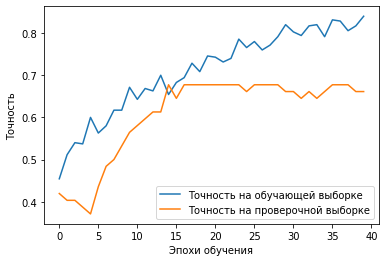

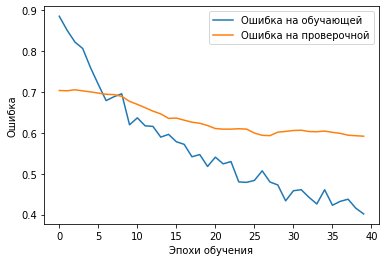

In [ ]:
# Создаём пустую сеть при помощи функции createModel()
model = Model_cl()

# Обучаем сеть
history = model.fit(X_train,         
          Y_train,         
          batch_size=12,    # Размер батча
          epochs=40,      # Количество эпох
          validation_data= (X_test, Y_test),
          verbose=1)       # Выводить процесс обучения на каждой эпохе

plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label ='Точность на проверочной выборке')
plt.xlabel('Эпохи обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label ='Ошибка на обучающей')
plt.plot(history.history['val_loss'], label ='Ошибка на проверочной')
plt.xlabel('Эпохи обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
#model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Обучаем сеть
history = model.fit(X_train,         
          Y_train,         
          batch_size=12,    # Размер батча
          epochs=20,      # Количество эпох
          validation_data= (X_test, Y_test),
          verbose=1)       # Выводить процесс обучения на каждой эпохе

plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label ='Точность на проверочной выборке')
plt.xlabel('Эпохи обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label ='Ошибка на обучающей')
plt.plot(history.history['val_loss'], label ='Ошибка на проверочной')
plt.xlabel('Эпохи обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

# Обучаем сеть
history = model.fit(X_train,         
          Y_train,         
          batch_size=12,    # Размер батча
          epochs=20,      # Количество эпох
          validation_data= (X_test, Y_test),
          verbose=1)       # Выводить процесс обучения на каждой эпохе

plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label ='Точность на проверочной выборке')
plt.xlabel('Эпохи обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label ='Ошибка на обучающей')
plt.plot(history.history['val_loss'], label ='Ошибка на проверочной')
plt.xlabel('Эпохи обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
predictions_test = model.predict(test) # делаем предсказание по X_test на неактивных молекулах

In [ ]:
predictions_test.shape

(1614, 1)

In [ ]:
for i in range(len(predictions_test)):
  if predictions_test[i] > 0.5:
    submission['Active'].values[i] = 0
  else:
    submission['Active'].values[i] = 1

In [ ]:
submission.to_csv('submission.csv', index=False)

#Всякий код со статей

In [ ]:
# Colab setup ------------------
import os, sys, subprocess
if "google.colab" in sys.modules:
    cmd = "pip install --upgrade watermark"
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)

In [ ]:
import glob

data_path = "/content"

with open(os.path.join(data_path, 'target.pdb'), 'r') as f:
    f_list = f.readlines()

In [ ]:
f_list[:30]

['HEADER    VIRAL PROTEIN                           18-NOV-20   7KR0              \n',
 'TITLE     CRYSTAL STRUCTURE OF SARS-COV-2 NSP3 MACRODOMAIN (C2 CRYSTAL FORM, 100\n',
 'TITLE    2 K)                                                                   \n',
 'CAVEAT     7KR0    RESIDUES LEU A 169 AND GLU A 170 THAT ARE NEXT TO EACH OTHER \n',
 'CAVEAT   2 7KR0    IN THE SAMPLE SEQUENCE ARE NOT PROPERLY LINKED IN THE B      \n',
 'CAVEAT   3 7KR0    CONFORMER.                                                   \n',
 'COMPND    MOL_ID: 1;                                                            \n',
 'COMPND   2 MOLECULE: NON-STRUCTURAL PROTEIN 3;                                  \n',
 'COMPND   3 CHAIN: A;                                                            \n',
 'COMPND   4 FRAGMENT: MACRODOMAIN (UNP RESIDUES 1024-1192);                      \n',
 'COMPND   5 SYNONYM: NSP3,PL2-PRO,PAPAIN-LIKE PROTEASE,PAPAIN-LIKE PROTEINASE,PL-\n',
 'COMPND   6 PRO;                          

In [ ]:
len(f_list)

7025

In [ ]:
!pip install kora -q
import kora.install.rdkit

     |████████████████████████████████| 57 kB 2.6 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# define the smiles string and covert it into a molecule sturcture ------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

mol = Chem.MolFromSmiles(caffeine_smiles)

# draw the modecule -----------------------------------------------------------
Draw.MolToFile(mol, 'caffeine.png')

# draw the molecule with property ---------------------------------------------
for i, atom in enumerate(mol.GetAtoms()):
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))
    
Draw.MolToFile(mol, 'caffeine_with_prop.png')

In [ ]:

# define the smiles string and covert it into a molecule sturcture ------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

mol = Chem.MolFromSmiles(caffeine_smiles)

# print the atoms of the molecule ---------------------------------------------
for atom in mol.GetAtoms():
    print(atom.GetIdx(),',',
          atom.GetAtomicNum(),',',
          atom.GetIsAromatic(),',',
          atom.GetSymbol())
 
# print the bonds of the molecule ---------------------------------------------
for bond in mol.GetBonds():
    print(bond.GetBeginAtomIdx(),',',
          bond.GetEndAtomIdx(),',',
          bond.GetBondType())

0 , 6 , False , C
1 , 7 , True , N
2 , 6 , True , C
3 , 7 , True , N
4 , 6 , True , C
5 , 6 , True , C
6 , 6 , True , C
7 , 8 , False , O
8 , 7 , True , N
9 , 6 , True , C
10 , 8 , False , O
11 , 7 , True , N
12 , 6 , False , C
13 , 6 , False , C
0 , 1 , SINGLE
1 , 2 , AROMATIC
2 , 3 , AROMATIC
3 , 4 , AROMATIC
4 , 5 , AROMATIC
5 , 6 , AROMATIC
6 , 7 , DOUBLE
6 , 8 , AROMATIC
8 , 9 , AROMATIC
9 , 10 , DOUBLE
9 , 11 , AROMATIC
11 , 12 , SINGLE
8 , 13 , SINGLE
5 , 1 , AROMATIC
11 , 4 , AROMATIC


In [ ]:
# import RDKit ----------------------------------------------------------------
from rdkit import Chem
from rdkit.Chem import RDKFingerprint
from rdkit.Chem import rdMolDescriptors

# import numpy for data type conversion ---------------------------------------
import numpy as np

# define the smiles string and covert it into a molecule sturcture ------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

mol = Chem.MolFromSmiles(caffeine_smiles)

# retrieving RDK Fingerprint --------------------------------------------------
fingerprint_rdk = RDKFingerprint(mol)
print(">>> RDK Fingerprint = ", fingerprint_rdk)

fingerprint_rdk_np = np.array(fingerprint_rdk)
print(">>> RDK Fingerprint in numpy = ", fingerprint_rdk_np)
print(">>> RDK Fingerprint in numpy shape = ", fingerprint_rdk_np.shape)

print()

# retrieving Morgan Fingerprint ----------------------------------------------- 
fingerprint_morgan = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2)
print(">>> Morgan Fingerprint = ", fingerprint_morgan)

fingerprint_morgan_np = np.array(fingerprint_morgan)
print(">>> Morgan Fingerprint in numpy : ", fingerprint_morgan_np)
print(">>> Morgan Fingerprint in numpy shape = ", fingerprint_morgan_np.shape)

print()

>>> RDK Fingerprint =  <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fe86eda61c0>
>>> RDK Fingerprint in numpy =  [1 1 0 ... 0 0 1]
>>> RDK Fingerprint in numpy shape =  (2048,)

>>> Morgan Fingerprint =  <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fe86eda6800>
>>> Morgan Fingerprint in numpy :  [0 0 0 ... 0 0 0]
>>> Morgan Fingerprint in numpy shape =  (2048,)



In [ ]:
# import library --------------------------------------------------------------
import numpy as np

# define SMILES characters ----------------------------------------------------
SMILES_CHARS = [' ',
                '#', '%', '(', ')', '+', '-', '.', '/',
                '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                '=', '@',
                'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P',
                'R', 'S', 'T', 'V', 'X', 'Z',
                '[', '\\', ']',
                'a', 'b', 'c', 'e', 'g', 'i', 'l', 'n', 'o', 'p', 'r', 's',
                't', 'u']
                
# define encoder and decoder --------------------------------------------------
smi2index = dict( (c,i) for i,c in enumerate( SMILES_CHARS ) )
index2smi = dict( (i,c) for i,c in enumerate( SMILES_CHARS ) )

def smiles_encoder( smiles, maxlen=120 ):
    X = np.zeros( ( maxlen, len( SMILES_CHARS ) ) )
    for i, c in enumerate( smiles ):
        X[i, smi2index[c] ] = 1
    return X

def smiles_decoder( X ):
    smi = ''
    X = X.argmax( axis=-1 )
    for i in X:
        smi += index2smi[ i ]
    return smi

# get a taste of caffeine -----------------------------------------------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

caffeine_encoding = smiles_encoder(caffeine_smiles)

print(caffeine_encoding.shape) # (120, 56)

(120, 56)


In [ ]:
!pip install git+https://github.com/samoturk/mol2vec

In [ ]:
# import rdkit/mol2vec/word2vec -----------------------------------------------
from rdkit import Chem
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec

# import numpy/pandas ---------------------------------------------------------
import numpy as np
import pandas as pd

print(">>> read the data file ... ")
hiv = pd.read_csv('HIV.csv')
print(">>> data shape = ", hiv.shape)
print(">>> data columns = ", hiv.columns, "\n")
print(hiv)
print()

print(">>> create mol from smiles ... ")
hiv['mol'] = hiv['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 

print(">>> create sentence from mol ... ")
hiv['sentence'] = hiv.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], radius=1)), axis=1)

print(">>> load the word2vec model ... ")
w2v_model = word2vec.Word2Vec.load('model_300dim.pkl')

print(">>> create embedding from sentence ... ")
hiv['embedding'] = [DfVec(x) for x in sentences2vec(hiv['sentence'], w2v_model)]

print(">>> data columns = ", hiv.columns, "\n")

hiv_mol2vec = np.array([x.vec for x in hiv['embedding']])
hiv_mol2vec = pd.DataFrame(hiv_mol2vec)
print(">>> hiv_mol2vec shape = ", hiv_mol2vec.shape)
print(hiv_mol2vec)
print()

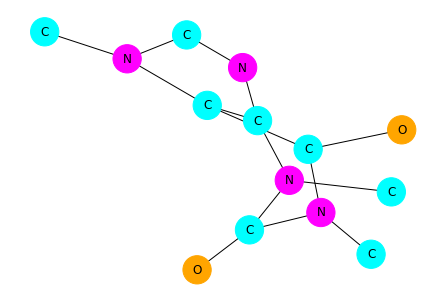

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
# import library --------------------------------------------------------------
from rdkit import Chem
import networkx as nx
import matplotlib.pyplot as plt

# define the smiles string and covert it into a molecule sturcture ------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
caffeine_mol = Chem.MolFromSmiles(caffeine_smiles)

# define the function for coverting rdkit object to networkx object -----------     
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

# conver rdkit object to networkx object --------------------------------------
caffeine_nx = mol_to_nx(caffeine_mol)

caffeine_atom = nx.get_node_attributes(caffeine_nx, 'atom_symbol')

color_map = {'C': 'cyan',
             'O': 'orange',
             'N': 'magenta'}  

caffeine_colors = []
for idx in caffeine_nx.nodes():
    if (caffeine_nx.nodes[idx]['atom_symbol'] in color_map):
        caffeine_colors.append(color_map[caffeine_nx.nodes[idx]['atom_symbol']])
    else:
        caffeine_colors.append('gray')
    
nx.draw(caffeine_nx,
        labels=caffeine_atom,
        with_labels = True,
        node_color=caffeine_colors,
        node_size=800)

plt.show()

# print out the adjacency matrix ---------------------------------------------- 
matrix = nx.to_numpy_matrix(caffeine_nx)
print(matrix)

In [ ]:
# import rdkit/networkx/graph2vec ---------------------------------------------
from rdkit import Chem
import networkx as nx
from karateclub import Graph2Vec

# import numpy/pandas ---------------------------------------------------------
import numpy as np
import pandas as pd

print(">>> read the data file ... ")
hiv = pd.read_csv('HIV.csv')
print(">>> data shape = ", hiv.shape)
print(">>> data columns = ", hiv.columns, "\n")
print(hiv)
print()

print(">>> create mol from smiles ... ")
hiv['mol'] = hiv['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 

# define the function for coverting rdkit object to networkx object -----------     
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

print(">>> create nx from mol ... ")
hiv['graph'] = hiv['mol'].apply(lambda x: mol_to_nx(x))

print(">>> create graph embedding ... ")
model = Graph2Vec()
model.fit(hiv['graph'])
hiv_graph2vec = model.get_embedding()

hiv_graph2vec = pd.DataFrame(hiv_graph2vec)
print(">>> hiv_graph2vec shape = ", hiv_graph2vec.shape)
print(hiv_graph2vec)
print()